In [58]:
#Import libraries
import os
import json
import pandas as pd 
import calendar
import numpy as np
from sklearn import metrics
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas.core.algorithms as algos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import traceback
from xgboost import XGBClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from pandas import Series
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import collections
import shap
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt 
import re
import string
import warnings

In [57]:
df1 = pd.read_csv('exercise_40_train.csv')

In [18]:
df1.shape

(40000, 101)

In [19]:
df1.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


In [21]:
# Categorical variables:
df1_cat = df1.loc[:,df1.dtypes == np.object]

C:\Users\fahiy\AppData\Local\Temp/ipykernel_16252/2515162611.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1_cat = df1.loc[:,df1.dtypes == np.object]


In [22]:
df1_num = df1.select_dtypes(exclude='object')
df1_num_list = list(df1.select_dtypes(exclude='object').columns)
print(f"There are {len(df1_num_list)} numerical features:\n", df1_num_list)

There are 89 numerical features:
 ['y', 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100']


In [23]:
df1_cat = df1.loc[:,df1.dtypes == np.object]
df1_cat

C:\Users\fahiy\AppData\Local\Temp/ipykernel_16252/2211213971.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1_cat = df1.loc[:,df1.dtypes == np.object]


,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Sun,-0.0085%,$3750.51991954505,female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,0.0077%,$448.867118077561,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,-0.0216%,$834.95775080472,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,1e-04%,$-48.1031003332715,male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


In [24]:
df1_cat.describe(include=[np.object])

C:\Users\fahiy\AppData\Local\Temp/ipykernel_16252/3483160286.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1_cat.describe(include=[np.object])


,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
count,40000,40000,40000,36144,40000,32829,40000,40000,40000,30743,40000,27164
unique,14,663,40000,2,2,51,1,12,5,7,2,1
top,Wednesday,0.0022%,$-908.650758424405,female,no,California,5-10 miles,December,progressive,ford,no,yes
freq,4930,193,1,18158,34022,3393,40000,8136,10877,9005,35506,27164


In [25]:
#Replacing $ and % and turn categorical data into numeric
df1_cat['x19'] = df1_cat['x19'].str.replace('$','').astype(float)
df1_cat['x7'] = df1_cat['x7'].str.replace('%','').astype(float)

C:\Users\fahiy\AppData\Local\Temp/ipykernel_16252/2838846718.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1_cat['x19'] = df1_cat['x19'].str.replace('$','').astype(float)
C:\Users\fahiy\AppData\Local\Temp/ipykernel_16252/2838846718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cat['x19'] = df1_cat['x19'].str.replace('$','').astype(float)
C:\Users\fahiy\AppData\Local\Temp/ipykernel_16252/2838846718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [26]:
# Checking categorical variables after replacing $ and %
df1_cat

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062,-908.650758,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064,-1864.962288,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-0.0008,-543.187403,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057,-182.626381,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109,967.007091,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Sun,-0.0085,3750.519920,female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,0.0077,448.867118,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,-0.0216,834.957751,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,0.0001,-48.103100,male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


#### We need to get rid of 'x7' and 'x19' from the list of categorical columns and transfer them over to numerical features. 

In [27]:
df1['x7'] = df1_cat['x7']
df1['x19'] = df1_cat['x19']
#df1_cat.drop(['x7','x19'],axis = 1, inplace = True)

C:\Users\fahiy\Documents\Springboard-Tools\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
# Checking categorical variables after removing x7 and x19 and turning them into numerical featuresd
df1_cat

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...
39995,Sun,female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


#### Doing get_dummies encoding on Categorical Variables

In [29]:
df1 = pd.get_dummies(df1, columns=['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99'])

In [30]:
df1.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x77_buick,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_no,x93_yes,x99_yes
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,...,0,0,0,1,0,0,0,1,0,1
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,...,0,0,0,1,0,0,0,1,0,1
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,-0.0008,0.952323,0.782974,-1.247022,...,0,0,0,0,0,1,0,1,0,1
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,...,0,0,0,0,1,0,0,1,0,1
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,...,0,0,0,0,0,0,1,0,1,1


In [31]:
#Exploring missing values
df1.isnull().sum()[df1.isnull().sum() !=0]

x5      2428
x11     5110
x14     9864
x16    11212
x22     2387
x26     2433
x30    32336
x38     2402
x41     9503
x42     9729
x44    34247
x45     8009
x49    12823
x52    16182
x54    12728
x55    17696
x57    32464
x61     7293
x63     2420
x64     5101
x67     2425
x68     2384
x74    12916
x75     5245
x76     5249
x78    11373
x79     2430
x80     5256
x83     2428
x85     9715
x86     2407
x88     2331
x89    10691
x91     5259
x92     2435
x94     2340
x95    12604
x96     6638
dtype: int64

#### Counting percentages of missing values

In [32]:
missing_data_count = df1.isnull().sum()
missing_data_percent = df1.isnull().sum() / len(df1) * 100

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(20)

There are 38 features having missing data.

Top 10 missing value features:


,Count,Percent
x44,34247,85.6175
x57,32464,81.1600
x30,32336,80.8400
x55,17696,44.2400
x52,16182,40.4550
x74,12916,32.2900
x49,12823,32.0575
x54,12728,31.8200
x95,12604,31.5100
x78,11373,28.4325


In [33]:
list_null_columns= missing_data.head(42).index.tolist()
list_null_columns

['x44',
 'x57',
 'x30',
 'x55',
 'x52',
 'x74',
 'x49',
 'x54',
 'x95',
 'x78',
 'x16',
 'x89',
 'x14',
 'x42',
 'x85',
 'x41',
 'x45',
 'x61',
 'x96',
 'x91',
 'x80',
 'x76',
 'x75',
 'x11',
 'x64',
 'x92',
 'x26',
 'x79',
 'x83',
 'x5',
 'x67',
 'x63',
 'x86',
 'x38',
 'x22',
 'x68',
 'x94',
 'x88']

#### We can see there are thousands of missing values for 38 different features and the lowest is close to 2000 and the highest is close to 35,000 our of 40,000 total observation. If we drop the null rows, we will miss significant amount of information and the model won't perform good at all. I decided to Doing isnull() on columns that have NaNs in them. Since there are 38 features with null values, we will have 38 extra features added to the dataset. However it would still be a good dataset with a good column to row ratio. 

In [34]:
list_null_columns = ['x44', 'x57', 'x30', 'x55', 'x52', 'x74', 'x49', 'x54', 'x95', 'x78', 'x16', 'x89', 'x14', 'x42', 
                     'x85', 'x41', 'x45', 'x61', 'x96', 'x91', 'x80', 'x76', 'x75', 'x11', 'x64', 'x92', 'x26', 'x79', 
                     'x83', 'x5', 'x67', 'x63', 'x86', 'x38', 'x22', 'x68', 'x94', 'x88']
list_with_isnull = []
for i in list_null_columns:
    s = i + '_isnull'
    list_with_isnull.append(s)
#list_with_isnull

In [35]:
list_with_isnull

['x44_isnull',
 'x57_isnull',
 'x30_isnull',
 'x55_isnull',
 'x52_isnull',
 'x74_isnull',
 'x49_isnull',
 'x54_isnull',
 'x95_isnull',
 'x78_isnull',
 'x16_isnull',
 'x89_isnull',
 'x14_isnull',
 'x42_isnull',
 'x85_isnull',
 'x41_isnull',
 'x45_isnull',
 'x61_isnull',
 'x96_isnull',
 'x91_isnull',
 'x80_isnull',
 'x76_isnull',
 'x75_isnull',
 'x11_isnull',
 'x64_isnull',
 'x92_isnull',
 'x26_isnull',
 'x79_isnull',
 'x83_isnull',
 'x5_isnull',
 'x67_isnull',
 'x63_isnull',
 'x86_isnull',
 'x38_isnull',
 'x22_isnull',
 'x68_isnull',
 'x94_isnull',
 'x88_isnull']

In [36]:
list_with_isnull = ['x44_isnull', 'x57_isnull', 'x30_isnull', 'x55_isnull', 'x52_isnull', 'x74_isnull', 'x99_isnull', 
                    'x49_isnull', 'x54_isnull', 'x95_isnull', 'x78_isnull', 'x16_isnull', 'x89_isnull', 'x14_isnull', 
                    'x42_isnull', 'x85_isnull', 'x41_isnull', 'x77_isnull', 'x45_isnull', 'x61_isnull', 'x33_isnull', 
                    'x96_isnull', 'x91_isnull', 'x80_isnull', 'x76_isnull', 'x75_isnull', 'x11_isnull', 'x64_isnull', 
                    'x24_isnull', 'x92_isnull', 'x26_isnull', 'x79_isnull', 'x83_isnull', 'x5x67_isnull', 'x63_isnull', 
                    'x86_isnull', 'x38_isnull', 'x22_isnull', 'x68_isnull', 'x94_isnull', 'x88_isnull']
for i,j in zip(list_with_isnull,list_null_columns): #Looping over lists simultaneously
    df1[i] = df1[j].isnull()

In [37]:
df1.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x24_isnull,x92_isnull,x26_isnull,x79_isnull,x83_isnull,x5x67_isnull,x63_isnull,x86_isnull,x38_isnull,x22_isnull
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,...,False,False,False,False,False,True,False,False,False,False
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,...,False,False,False,False,False,False,False,False,False,False
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,-0.0008,0.952323,0.782974,-1.247022,...,False,False,False,False,False,False,False,False,False,False
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,...,False,False,False,False,False,False,False,False,False,False
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,...,False,False,False,False,False,False,False,False,False,False


### Feature Engineering: Imputation

We see above that there are 38 columns with missing values. I will replace them with the mean of the corresponding column. 

In [38]:
list_null_columns
df1[list_null_columns] = df1[list_null_columns].fillna(value=df1[list_null_columns].mean())

In [39]:
y = df1['y']
X = df1.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Defined a binning function and passing in parameters in order to determine the features with high predictive power. 

In [42]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    #print("justmiss", justmiss)
    #print("notmiss", notmiss)
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            #print("I am here 1",r, n,len(d2))
            n = n - 1 
            
        except Exception as e:
            n = n - 1
            #print("I am here e",n)

    if len(d2) == 1:
        #print("I am second step ",r, n)
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        #print(justmiss.count().Y)
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    print(np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT))
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    #print("hi",d3.IV )
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        print(i)
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                #print("Number and unique value greater than 2")
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                #print("I am here 2")
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [59]:
final_iv, IV = data_vars(X_train, y_train)

x1
0   -0.039676
1    0.038588
dtype: float64
x2
0   -0.040195
1   -0.012422
2    0.009809
3    0.041532
dtype: float64
x4
0    0.019799
1   -0.020081
dtype: float64
x5
0    0.079267
1    0.026966
2    0.000247
3   -0.117111
dtype: float64
x6
0   -0.015991
1    0.015811
dtype: float64
x7
0     1.096738
1     0.709782
2     0.397904
3     0.358444
4     0.105831
5    -0.075490
6    -0.218354
7    -0.235374
8    -0.367603
9    -0.491797
10   -0.784919
11   -1.210941
12   -1.502494
dtype: float64
x8
0    0.083082
1    0.031694
2   -0.007338
3   -0.114915
dtype: float64
x9
0   -0.008861
1    0.008806
dtype: float64
x10
0    0.003277
1   -0.003285
dtype: float64
x11
0   -0.028041
1    0.034965
dtype: float64
x12
0   -0.002779
1    0.002773
dtype: float64
x13
0    0.076399
1   -0.014460
2   -0.020593
3   -0.044357
dtype: float64
x14
0    0.013325
1   -0.026748
dtype: float64
x15
0    0.008304
1   -0.008353
dtype: float64
x16
0    0.162704
1   -0.421307
dtype: float64
x17
0   -0.019569
1   -0

Filtering the variables whole predictive power is between 0.01 and 0.8 in order to get rid of features with overly high and too low predictive power. 

In [60]:
#features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(32000, 31)

,x16,x16_isnull,x18,x19,x28,x31_no,x31_yes,x33_Oregon,x33_Washington,x35,...,x70,x75,x78,x78_isnull,x81,x89,x93_no,x93_yes,x95,x96
19652,99.738577,False,70.973557,2559.126346,16.401540,1,0,0,0,0.822373,...,1.436937,1.913698,46.112792,False,0.495635,12.280060,1,0,2.382353,10.525530
37548,100.702408,True,71.885470,2232.308321,14.973629,1,0,0,0,-0.090939,...,1.864440,3.071995,54.076736,True,0.258830,10.767838,1,0,0.031886,9.312930
35728,100.702408,False,85.348601,6.838428,17.924151,0,1,0,0,1.336024,...,0.681102,0.468006,39.595371,True,-0.047550,9.254568,0,1,0.551935,13.683068
15736,100.702408,True,89.868647,351.946759,7.792557,0,1,0,0,1.278952,...,0.858387,-0.281267,40.846000,True,-0.733875,10.767838,1,0,-1.756241,10.436764
25589,99.637543,True,78.117430,1061.966198,19.162191,0,1,0,0,-1.274895,...,0.585945,1.266756,49.933173,False,1.834405,10.767838,1,0,1.012412,10.525530


#### Converting the boolean columns in X2 into integer so that no 'input type errors' exist

In [67]:
X2["x16_isnull"] = X2["x16_isnull"].astype(int)
X2["x45_isnull"] = X2["x45_isnull"].astype(int)
X2["x78_isnull"] = X2["x78_isnull"].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [71]:
X2.head()

,x16,x16_isnull,x18,x19,x28,x31_no,x31_yes,x33_Oregon,x33_Washington,x35,...,x70,x75,x78,x78_isnull,x81,x89,x93_no,x93_yes,x95,x96
19652,99.738577,0,70.973557,2559.126346,16.401540,1,0,0,0,0.822373,...,1.436937,1.913698,46.112792,0,0.495635,12.280060,1,0,2.382353,10.525530
37548,100.702408,1,71.885470,2232.308321,14.973629,1,0,0,0,-0.090939,...,1.864440,3.071995,54.076736,1,0.258830,10.767838,1,0,0.031886,9.312930
35728,100.702408,0,85.348601,6.838428,17.924151,0,1,0,0,1.336024,...,0.681102,0.468006,39.595371,1,-0.047550,9.254568,0,1,0.551935,13.683068
15736,100.702408,1,89.868647,351.946759,7.792557,0,1,0,0,1.278952,...,0.858387,-0.281267,40.846000,1,-0.733875,10.767838,1,0,-1.756241,10.436764
25589,99.637543,1,78.117430,1061.966198,19.162191,0,1,0,0,-1.274895,...,0.585945,1.266756,49.933173,0,1.834405,10.767838,1,0,1.012412,10.525530


In [69]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 19652 to 17530
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x16             32000 non-null  float64
 1   x16_isnull      32000 non-null  int32  
 2   x18             32000 non-null  float64
 3   x19             32000 non-null  float64
 4   x28             32000 non-null  float64
 5   x31_no          32000 non-null  uint8  
 6   x31_yes         32000 non-null  uint8  
 7   x33_Oregon      32000 non-null  uint8  
 8   x33_Washington  32000 non-null  uint8  
 9   x35             32000 non-null  float64
 10  x3_Saturday     32000 non-null  uint8  
 11  x3_Tuesday      32000 non-null  uint8  
 12  x3_Wed          32000 non-null  uint8  
 13  x3_Wednesday    32000 non-null  uint8  
 14  x40             32000 non-null  float64
 15  x45_isnull      32000 non-null  int32  
 16  x47             32000 non-null  float64
 17  x52             32000 non-n

Renaming X2 to X1 to make sure only numeric data exist. Passing in input parameters into iterate_vir() finction which checks for highly correlated variables. If any exists, only one will be retained, others will be removed. Inputs should be uncorrelated to each other in a model and highly correalted to the target for the model to perform its best. 

In [70]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1


divide by zero encountered in double_scalars


Removing x31_no with VIF of inf
Iteration # 2
Removing x93_no with VIF of 30646.459838
Iteration # 3
Removing x16 with VIF of 2636.908419
Iteration # 4
Removing x18 with VIF of 364.940595
Iteration # 5
Removing x47 with VIF of 209.126705
Iteration # 6
Removing x78 with VIF of 152.227831
Iteration # 7
Removing x96 with VIF of 48.049125
Iteration # 8
Removing x28 with VIF of 22.616351
Iteration # 9
Removing x40 with VIF of 18.784642
Iteration # 10
Removing x68 with VIF of 12.067317
Iteration # 11
Removing x89 with VIF of 6.862471
Iteration # 12
Removing x70 with VIF of 5.066810
Iteration # 13
Complete


X_train dataFrame now has features uncorrelated to each other but higly correlated to the target. 

In [72]:
X_train=final_df
display(len(X_train.columns))
display(X_train.columns)
X_train.head()

19

Index(['x16_isnull', 'x19', 'x31_yes', 'x33_Oregon', 'x33_Washington', 'x35',
       'x3_Saturday', 'x3_Tuesday', 'x3_Wed', 'x3_Wednesday', 'x45_isnull',
       'x52', 'x62', 'x7', 'x75', 'x78_isnull', 'x81', 'x93_yes', 'x95'],
      dtype='object')

,x16_isnull,x19,x31_yes,x33_Oregon,x33_Washington,x35,x3_Saturday,x3_Tuesday,x3_Wed,x3_Wednesday,x45_isnull,x52,x62,x7,x75,x78_isnull,x81,x93_yes,x95
19652,0,2559.126346,0,0,0,0.822373,0,0,0,0,1,3.172218,4.429983,-0.0297,1.913698,0,0.495635,0,2.382353
37548,1,2232.308321,0,0,0,-0.090939,0,0,0,0,0,7.316212,3.065737,0.0071,3.071995,1,0.258830,0,0.031886
35728,0,6.838428,1,0,0,1.336024,0,0,0,0,0,-1.662405,4.755224,-0.0053,0.468006,1,-0.047550,1,0.551935
15736,1,351.946759,1,0,0,1.278952,0,0,1,0,0,11.028501,2.548398,-0.0040,-0.281267,1,-0.733875,0,-1.756241
25589,1,1061.966198,1,0,0,-1.274895,0,0,0,0,1,18.806022,3.426957,0.0046,1.266756,0,1.834405,0,1.012412


Ensuring same features exist in X_test dataset as well. 

In [80]:
X_test=X_test[X_train.columns]
X_test.head()

,x16_isnull,x19,x31_yes,x33_Oregon,x33_Washington,x35,x3_Saturday,x3_Tuesday,x3_Wed,x3_Wednesday,x45_isnull,x52,x62,x7,x75,x78_isnull,x81,x93_yes,x95
28607,True,1848.111402,0,0,0,0.365805,0,0,0,0,False,6.609760,3.144890,0.0038,3.502715,False,1.550888,0,-1.937733
3689,False,-292.180019,1,0,0,0.504557,0,0,0,0,False,4.986956,13.390917,-0.0137,1.962556,False,-2.297945,0,0.286036
6405,True,526.169704,0,0,0,-0.072667,0,0,0,0,False,2.712978,6.783346,-0.0029,1.463898,True,-0.177795,0,0.031886
35355,False,-468.023258,0,0,0,3.475983,0,0,1,0,False,-3.339511,3.586534,0.0006,1.008143,False,2.328034,0,0.153534
16520,False,-760.746128,0,0,0,0.185867,1,0,0,0,False,4.986956,3.207846,-0.0187,3.057805,False,-2.360573,0,0.031886


### Training First Model: Random Forest

In [169]:
#Fitting Model
from sklearn.metrics import f1_score
rfmodel = RandomForestClassifier(n_estimators=1000, random_state = 1,n_jobs=-1)
rfmodel.fit(X_train, y_train)
#Predict Value for Validation data
rfpred = rfmodel.predict(X_test)
rfpred_prob=rfmodel.predict_proba(X_test)
print('AUC=%.3f:' % roc_auc_score(y_test, rfpred_prob[:,1]))
print('Accuracy=%.3f:' % rfmodel.score(X_test, y_test))
print('f1-score=%.3f' % (f1_score(y_test, rfpred, average='weighted')))

AUC=0.714:
Accuracy=0.852:
f1-score=0.795


### Training Second Model: Logistic Regression

In [171]:
#Fittin Model
logmodel = LogisticRegression(max_iter=3000)
logmodel.fit(X_train, y_train)
#Predict Value for Validation data#Predict Value for Validation data
logpred = logmodel.predict(X_test)
logpred_prob=logmodel.predict_proba(X_test)
print('AUC=%.3f:' % roc_auc_score(y_test, logpred_prob[:,1]))
print('Accuracy=%.3f:' % logmodel.score(X_test, y_test))
print('f1-score=%.3f' % (f1_score(y_test, logpred, average='weighted')))

AUC=0.647:
Accuracy=0.854:
f1-score=0.787


### Training 3rd Model: XGBoost

In [180]:
xgmodel = XGBClassifier(n_estimators = 100, max_depth=30, max_delta_step=4, scale_pos_weight=49,
                                      random_state = 42, verbosity=2, n_jobs=-1, oob_score=True)
xgmodel.fit(X_train, y_train)
# make predictions for test data
xgpred = logmodel.predict(X_test)
xgpred_prob=logmodel.predict_proba(X_test)
print('AUC=%.3f:' % roc_auc_score(y_test, xgpred_prob[:,1]))
print('Accuracy=%.3f:' % logmodel.score(X_test, y_test))
print('f1-score=%.3f' % (f1_score(y_test, xgpred, average='weighted')))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "oob_score" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:38:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2948 extra nodes, 0 pruned nodes, max_depth=30
[10:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:38:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 

[10:38:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1064 extra nodes, 0 pruned nodes, max_depth=30
[10:38:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 974 extra nodes, 0 pruned nodes, max_depth=30
[10:38:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1090 extra nodes, 0 pruned nodes, max_depth=30
[10:38:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 830 extra nodes, 0 pruned nodes, max_depth=30
[10:38:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 642 extra nodes, 0 pruned nodes, max_depth=30
[10:38:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 964 ex

[10:38:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 348 extra nodes, 0 pruned nodes, max_depth=30
[10:38:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 528 extra nodes, 0 pruned nodes, max_depth=29
[10:38:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 428 extra nodes, 0 pruned nodes, max_depth=30
[10:38:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 472 extra nodes, 0 pruned nodes, max_depth=30
[10:38:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 518 extra nodes, 0 pruned nodes, max_depth=28
[10:38:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 208 extr

In [181]:
print('AUC=%.3f:' % roc_auc_score(y_test, xgpred_prob[:,1]))
print('Accuracy=%.3f:' % logmodel.score(X_test, y_test))
print('f1-score=%.3f' % (f1_score(y_test, xgpred, average='weighted')))

AUC=0.647:
Accuracy=0.854:
f1-score=0.787


### Comparing Models:

In [182]:
from sklearn import metrics
models=['Random Forest Classifier','Logistic Regression', "XGBoost"]
accuracy=[rfpred,logpred,xgpred]
for i,j in zip(models,accuracy):
  print("Accuracy for {} : {}".format(i,metrics.accuracy_score(y_test,j)))

Accuracy for Random Forest Classifier : 0.85225
Accuracy for Logistic Regression : 0.853875
Accuracy for XGBoost : 0.853875


Now getting the probabilities; 0 or 1 output, by using the predict_proba function and then slicing the list so that we only end up with the probability that the target variable will be 1.
I will be using r_prob to plot a diagonal line which covers 50% of the curve or has an AUC of 0.5. It is called random choice because it has a 50% chance of correctly predicting the target variable.

In [183]:
r_prob=[0 for i in range(len(y_test))]
rfpred_probs=rfmodel.predict_proba(X_test)[::,1]
logpred_probs=logmodel.predict_proba(X_test)[::,1]
xgpred_probs=xgmodel.predict_proba(X_test)[::,1]

Getting the FPR,TPR and threshold values for each model.

In [184]:
fpr1, tpr1, _a = metrics.roc_curve(y_test,  rfpred_probs)
fpr2,tpr2,_b= metrics.roc_curve(y_test,  logpred_probs)
fpr3,tpr3,_c= metrics.roc_curve(y_test,  xgpred_probs)

Plotting the curve

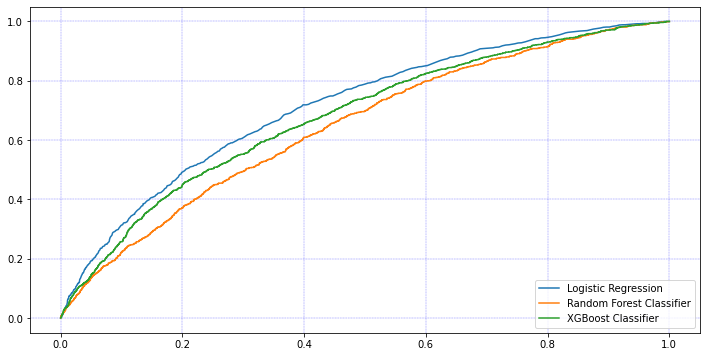

In [185]:
plt.figure(figsize=(12,6))
plt.plot(fpr1,tpr1,label="Logistic Regression")
plt.plot(fpr2,tpr2,label="Random Forest Classifier")
plt.plot(fpr3,tpr3,label="XGBoost Classifier")
plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

## Preprocessing Test Dataset

In [142]:
df2 = pd.read_csv('exercise_40_test.csv')
df2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,4.747627,20.509439,Wednesday,2.299105,-1.815777,-0.752166,0.0098%,-3.240309,0.587948,-0.260721,...,NaN,12.542333,no,3.107683,0.533904,12.438759,7.298306,0,NaN,93.567120
1,1.148654,19.301465,Fri,1.862200,-0.773707,-1.461276,0.0076%,0.443209,0.522113,-1.090886,...,-0.848567,7.213829,yes,4.276078,NaN,10.386987,12.527094,1,yes,98.607486
2,4.986860,18.769675,Saturday,1.040845,-1.548690,2.632948,-5e-04%,-1.167885,5.739275,0.222975,...,1.143388,10.483928,no,2.090868,-1.780474,11.328177,11.628247,0,yes,94.578246
3,3.709183,18.374375,Tuesday,-0.169882,-2.396549,-0.784673,-0.016%,-2.662226,1.548050,0.210141,...,0.693646,3.862867,no,2.643847,1.662240,10.064961,10.550014,1,NaN,100.346261
4,3.801616,20.205541,Monday,2.092652,-0.732784,-0.703101,0.0186%,0.056422,2.878167,-0.457618,...,-0.834763,3.632039,yes,4.074434,NaN,9.255766,12.716137,1,yes,102.578918


In [143]:
df2.shape

(10000, 100)

In [144]:
# Categorical variables:
df2_cat = df2.loc[:,df2.dtypes == object]

In [145]:
df2_num = df2.select_dtypes(exclude='object')
df2_num_list = list(df2.select_dtypes(exclude='object').columns)
print(f"There are {len(df2_num_list)} numerical features:\n", df2_num_list)

There are 88 numerical features:
 ['x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100']


In [146]:
df2_cat = df2.loc[:,df2.dtypes == object]
df2_cat

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wednesday,0.0098%,$120.216189955777,NaN,no,Florida,5-10 miles,May,progressive,mercedes,no,NaN
1,Fri,0.0076%,$-267.562586413086,female,yes,North Carolina,5-10 miles,July,allstate,ford,yes,yes
2,Saturday,-5e-04%,$-311.292903116571,male,no,NaN,5-10 miles,January,progressive,NaN,no,yes
3,Tuesday,-0.016%,$2229.14940030076,female,no,Mississippi,5-10 miles,July,geico,subaru,no,NaN
4,Monday,0.0186%,$-469.049529991235,female,yes,Georgia,5-10 miles,January,progressive,ford,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Tue,0.0141%,$1032.01731048423,male,no,Maryland,5-10 miles,July,geico,buick,no,NaN
9996,Wednesday,-0.0047%,$-1655.58850038254,male,no,Tennessee,5-10 miles,July,progressive,buick,yes,yes
9997,Sat,-0.003%,$2382.45210273696,male,yes,Florida,5-10 miles,July,progressive,ford,no,yes
9998,Sunday,0.0088%,$-1267.84808612857,female,no,Florida,5-10 miles,December,geico,buick,no,yes


In [147]:
df2_cat.describe(include=[object])

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
count,10000,10000,10000,9031,10000,8230,10000,10000,10000,7682,10000,6700
unique,14,570,10000,2,2,51,1,12,5,7,2,1
top,Wednesday,8e-04%,$120.216189955777,female,no,California,5-10 miles,August,progressive,ford,no,yes
freq,1224,56,1,4532,8500,841,10000,2055,2703,2325,8848,6700


In [148]:
#Replacing $ and % and turn categorical data into numeric
df2_cat['x19'] = df2_cat['x19'].str.replace('$','').astype(float)
df2_cat['x7'] = df2_cat['x7'].str.replace('%','').astype(float)

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [149]:
# Checking categorical variables after replacing $ and %
df2_cat

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wednesday,0.0098,120.216190,NaN,no,Florida,5-10 miles,May,progressive,mercedes,no,NaN
1,Fri,0.0076,-267.562586,female,yes,North Carolina,5-10 miles,July,allstate,ford,yes,yes
2,Saturday,-0.0005,-311.292903,male,no,NaN,5-10 miles,January,progressive,NaN,no,yes
3,Tuesday,-0.0160,2229.149400,female,no,Mississippi,5-10 miles,July,geico,subaru,no,NaN
4,Monday,0.0186,-469.049530,female,yes,Georgia,5-10 miles,January,progressive,ford,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Tue,0.0141,1032.017310,male,no,Maryland,5-10 miles,July,geico,buick,no,NaN
9996,Wednesday,-0.0047,-1655.588500,male,no,Tennessee,5-10 miles,July,progressive,buick,yes,yes
9997,Sat,-0.0030,2382.452103,male,yes,Florida,5-10 miles,July,progressive,ford,no,yes
9998,Sunday,0.0088,-1267.848086,female,no,Florida,5-10 miles,December,geico,buick,no,yes


In [151]:
df2['x7'] = df2_cat['x7']
df2['x19'] = df2_cat['x19']
#df2_cat.drop(['x7','x19'],axis = 1, inplace = True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [152]:
# Checking categorical variables after removing x7 and x19 and turning them into numerical featuresd
df2_cat.head()

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wednesday,NaN,no,Florida,5-10 miles,May,progressive,mercedes,no,NaN
1,Fri,female,yes,North Carolina,5-10 miles,July,allstate,ford,yes,yes
2,Saturday,male,no,NaN,5-10 miles,January,progressive,NaN,no,yes
3,Tuesday,female,no,Mississippi,5-10 miles,July,geico,subaru,no,NaN
4,Monday,female,yes,Georgia,5-10 miles,January,progressive,ford,yes,yes


In [153]:
df2 = pd.get_dummies(df2, columns=['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99'])

In [154]:
df2.head()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x77_buick,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_no,x93_yes,x99_yes
0,4.747627,20.509439,2.299105,-1.815777,-0.752166,0.0098,-3.240309,0.587948,-0.260721,101.113628,...,0,0,0,1,0,0,0,1,0,0
1,1.148654,19.301465,1.862200,-0.773707,-1.461276,0.0076,0.443209,0.522113,-1.090886,104.791999,...,0,0,1,0,0,0,0,0,1,1
2,4.986860,18.769675,1.040845,-1.548690,2.632948,-0.0005,-1.167885,5.739275,0.222975,102.109546,...,0,0,0,0,0,0,0,1,0,1
3,3.709183,18.374375,-0.169882,-2.396549,-0.784673,-0.0160,-2.662226,1.548050,0.210141,82.653354,...,0,0,0,0,0,1,0,1,0,0
4,3.801616,20.205541,2.092652,-0.732784,-0.703101,0.0186,0.056422,2.878167,-0.457618,75.036421,...,0,0,1,0,0,0,0,0,1,1


In [155]:
#Exploring missing values
df2.isnull().sum()[df2.isnull().sum() !=0]

x5      602
x11    1329
x14    2428
x16    2753
x22     613
x26     617
x30    8085
x38     565
x41    2404
x42    2418
x44    8566
x45    2063
x49    3254
x52    4080
x54    3206
x55    4424
x57    8077
x61    1766
x63     587
x64    1262
x67     620
x68     600
x74    3163
x75    1266
x76    1356
x78    2866
x79     610
x80    1315
x83     572
x85    2419
x86     602
x88     591
x89    2675
x91    1310
x92     626
x94     615
x95    3172
x96    1628
dtype: int64

In [156]:
missing_data_count = df2.isnull().sum()
missing_data_percent = df2.isnull().sum() / len(df2) * 100

missing_data_test = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(20)

There are 38 features having missing data.

Top 10 missing value features:


,Count,Percent
x44,8566,85.66
x30,8085,80.85
x57,8077,80.77
x55,4424,44.24
x52,4080,40.80
x49,3254,32.54
x54,3206,32.06
x95,3172,31.72
x74,3163,31.63
x78,2866,28.66


In [158]:
list_null_test= missing_data_test.head(38).index.tolist()
list_null_test

['x44',
 'x30',
 'x57',
 'x55',
 'x52',
 'x49',
 'x54',
 'x95',
 'x74',
 'x78',
 'x16',
 'x89',
 'x14',
 'x85',
 'x42',
 'x41',
 'x45',
 'x61',
 'x96',
 'x76',
 'x11',
 'x80',
 'x91',
 'x75',
 'x64',
 'x92',
 'x67',
 'x26',
 'x94',
 'x22',
 'x79',
 'x86',
 'x5',
 'x68',
 'x88',
 'x63',
 'x83',
 'x38']

In [160]:
list_null_test = ['x44', 'x57', 'x30', 'x55', 'x52', 'x74', 'x49', 'x54', 'x95', 'x78', 'x16', 'x89', 'x14', 'x42', 
                     'x85', 'x41', 'x45', 'x61', 'x96', 'x91', 'x80', 'x76', 'x75', 'x11', 'x64', 'x92', 'x26', 'x79', 
                     'x83', 'x5', 'x67', 'x63', 'x86', 'x38', 'x22', 'x68', 'x94', 'x88']
list_with_isnull_test = []
for i in list_null_test:
    s = i + '_isnull'
    list_with_isnull_test.append(s)
list_with_isnull_test

['x44_isnull',
 'x57_isnull',
 'x30_isnull',
 'x55_isnull',
 'x52_isnull',
 'x74_isnull',
 'x49_isnull',
 'x54_isnull',
 'x95_isnull',
 'x78_isnull',
 'x16_isnull',
 'x89_isnull',
 'x14_isnull',
 'x42_isnull',
 'x85_isnull',
 'x41_isnull',
 'x45_isnull',
 'x61_isnull',
 'x96_isnull',
 'x91_isnull',
 'x80_isnull',
 'x76_isnull',
 'x75_isnull',
 'x11_isnull',
 'x64_isnull',
 'x92_isnull',
 'x26_isnull',
 'x79_isnull',
 'x83_isnull',
 'x5_isnull',
 'x67_isnull',
 'x63_isnull',
 'x86_isnull',
 'x38_isnull',
 'x22_isnull',
 'x68_isnull',
 'x94_isnull',
 'x88_isnull']

In [162]:
list_with_isnull_test = ['x44_isnull', 'x57_isnull', 'x30_isnull', 'x55_isnull', 'x52_isnull', 'x74_isnull', 'x99_isnull', 
                    'x49_isnull', 'x54_isnull', 'x95_isnull', 'x78_isnull', 'x16_isnull', 'x89_isnull', 'x14_isnull', 
                    'x42_isnull', 'x85_isnull', 'x41_isnull', 'x77_isnull', 'x45_isnull', 'x61_isnull', 'x33_isnull', 
                    'x96_isnull', 'x91_isnull', 'x80_isnull', 'x76_isnull', 'x75_isnull', 'x11_isnull', 'x64_isnull', 
                    'x24_isnull', 'x92_isnull', 'x26_isnull', 'x79_isnull', 'x83_isnull', 'x5x67_isnull', 'x63_isnull', 
                    'x86_isnull', 'x38_isnull', 'x22_isnull', 'x68_isnull', 'x94_isnull', 'x88_isnull']
for i,j in zip(list_with_isnull_test,list_null_test): #Looping over lists simultaneously
    df1[i] = df1[j].isnull()

In [163]:
df2.head()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x77_buick,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_no,x93_yes,x99_yes
0,4.747627,20.509439,2.299105,-1.815777,-0.752166,0.0098,-3.240309,0.587948,-0.260721,101.113628,...,0,0,0,1,0,0,0,1,0,0
1,1.148654,19.301465,1.862200,-0.773707,-1.461276,0.0076,0.443209,0.522113,-1.090886,104.791999,...,0,0,1,0,0,0,0,0,1,1
2,4.986860,18.769675,1.040845,-1.548690,2.632948,-0.0005,-1.167885,5.739275,0.222975,102.109546,...,0,0,0,0,0,0,0,1,0,1
3,3.709183,18.374375,-0.169882,-2.396549,-0.784673,-0.0160,-2.662226,1.548050,0.210141,82.653354,...,0,0,0,0,0,1,0,1,0,0
4,3.801616,20.205541,2.092652,-0.732784,-0.703101,0.0186,0.056422,2.878167,-0.457618,75.036421,...,0,0,1,0,0,0,0,0,1,1


In [165]:
list_null_test
df2[list_null_test] = df2[list_null_test].fillna(value=df2[list_null_test].mean())

In [168]:
sum(df2.isnull().sum())

0

In [186]:
#Fitting Model
from sklearn.metrics import f1_score
rfmodel2 = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
rfmodel2.fit(X_train, y_train)
#Predict Value for Validation data
rfpred2 = rfmodel.predict(df2)
rfpred2_prob=rfmodel2.predict_proba(df2)

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x1
- x10
- x100
- x11
- x12
- ...
Feature names seen at fit time, yet now missing:
- x16_isnull
- x45_isnull
- x78_isnull



ValueError: X has 187 features, but RandomForestClassifier is expecting 19 features as input.

In [ ]:
predicted_value_rf = rfmodel.predict(df2)

In [ ]:
my_submission = pd.DataFrame({'Id': test.Id, 'Target': rfpred2})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [ ]:
print('AUC=%.3f:' % roc_auc_score(y_test, rfpred2_prob[:,1]))
print('Accuracy=%.3f:' % rfmodel2.score(df2, y_test))
print('f1-score=%.3f' % (f1_score(y_test, rfpred2, average='weighted')))